# 📊 Student Performance Prediction — Exploratory Data Analysis (EDA)

This notebook performs Exploratory Data Analysis on the **Student Performance Dataset**.
The goal is to understand the data, the student/engineer a target variable (pass/fail), and prepare the dataset for modeling using Decision Trees and Random Forests.

### **Objectives**
- Inspect dataset structure  
- Identify missing values  
- Explore numerical & categorical features  
- Create a binary pass/fail target  
- Visualize distributions and correlations  


In [22]:
# IMPORTING REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)


In [23]:
# LOAD THE DATASET
# We read the CSV file placed in the 'data' folder.
# Always inspect the first few rows to verify correct loading.

df = pd.read_csv(r"C:\Users\talar\student-performance-capstone\data\student.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
# BASIC STRUCTURE CHECK

print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [25]:
# CHECK FOR MISSING VALUES

df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [26]:
# NUMERICAL SUMMARY

df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [27]:

# VALUE COUNTS FOR CATEGORICAL FEATURES


categorical_cols = df.select_dtypes(include="object").columns.tolist()

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for gender:
gender
female    518
male      482
Name: count, dtype: int64

Value counts for race/ethnicity:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Value counts for parental level of education:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Value counts for lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Value counts for test preparation course:
test preparation course
none         642
completed    358
Name: count, dtype: int64


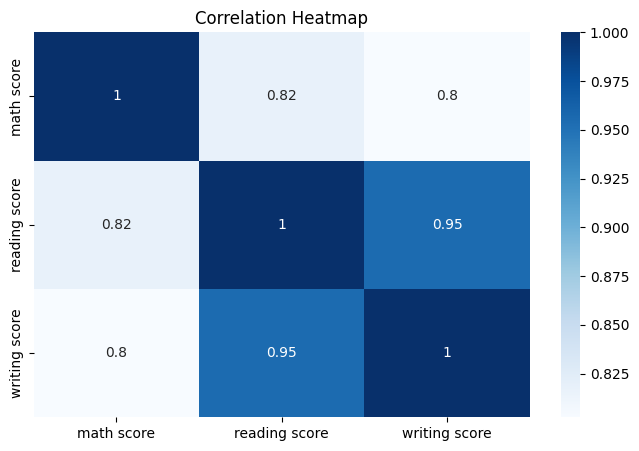

In [28]:
# CORRELATION BETWEEN NUMERIC SCORES

plt.figure(figsize=(8,5))
sns.heatmap(df[["math score","reading score","writing score"]].corr(),
            annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


In [29]:
# CREATING TARGET VARIABLE (Pass = 1, Fail = 0)


df["pass_fail"] = df["math score"].apply(lambda x: 1 if x >= 60 else 0)
df["pass_fail"].value_counts()


pass_fail
1    677
0    323
Name: count, dtype: int64

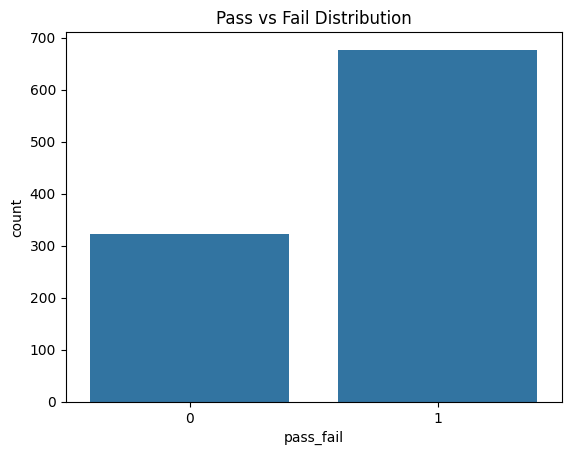

In [30]:
# PLOT TARGET DISTRIBUTION

sns.countplot(data=df, x="pass_fail")
plt.title("Pass vs Fail Distribution")
plt.show()


In [31]:
# SPLIT INTO X (FEATURES) AND y (TARGET)

X = df.drop(columns=["pass_fail"])
y = df["pass_fail"]


In [32]:
# ---------------------------------------------------------
# IDENTIFY CATEGORICAL & NUMERIC COLUMNS
# ---------------------------------------------------------

categorical_cols = X.select_dtypes(include="object").columns.tolist()
numerical_cols = X.select_dtypes(include="number").columns.tolist()

categorical_cols, numerical_cols


(['gender',
  'race/ethnicity',
  'parental level of education',
  'lunch',
  'test preparation course'],
 ['math score', 'reading score', 'writing score'])

In [33]:
# PREPROCESSING PIPELINE SETUP


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)


In [34]:
# SPLITTING DATA INTO TRAIN AND TEST SETS (80/20)


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((800, 8), (200, 8))

In [35]:
# APPLY PREPROCESSING

X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)

X_train_p.shape, X_test_p.shape


((800, 20), (200, 20))

In [36]:
# DECISION TREE MODEL TRAINING

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_p, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

Decision Tree Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


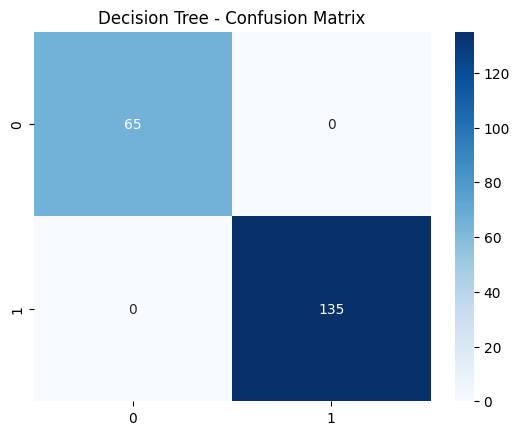

In [37]:
# DECISION TREE EVALUATION

dt_preds = dt.predict(X_test_p)

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Precision:", precision_score(y_test, dt_preds))
print("Recall:", recall_score(y_test, dt_preds))
print("F1 Score:", f1_score(y_test, dt_preds))

cm_dt = confusion_matrix(y_test, dt_preds)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


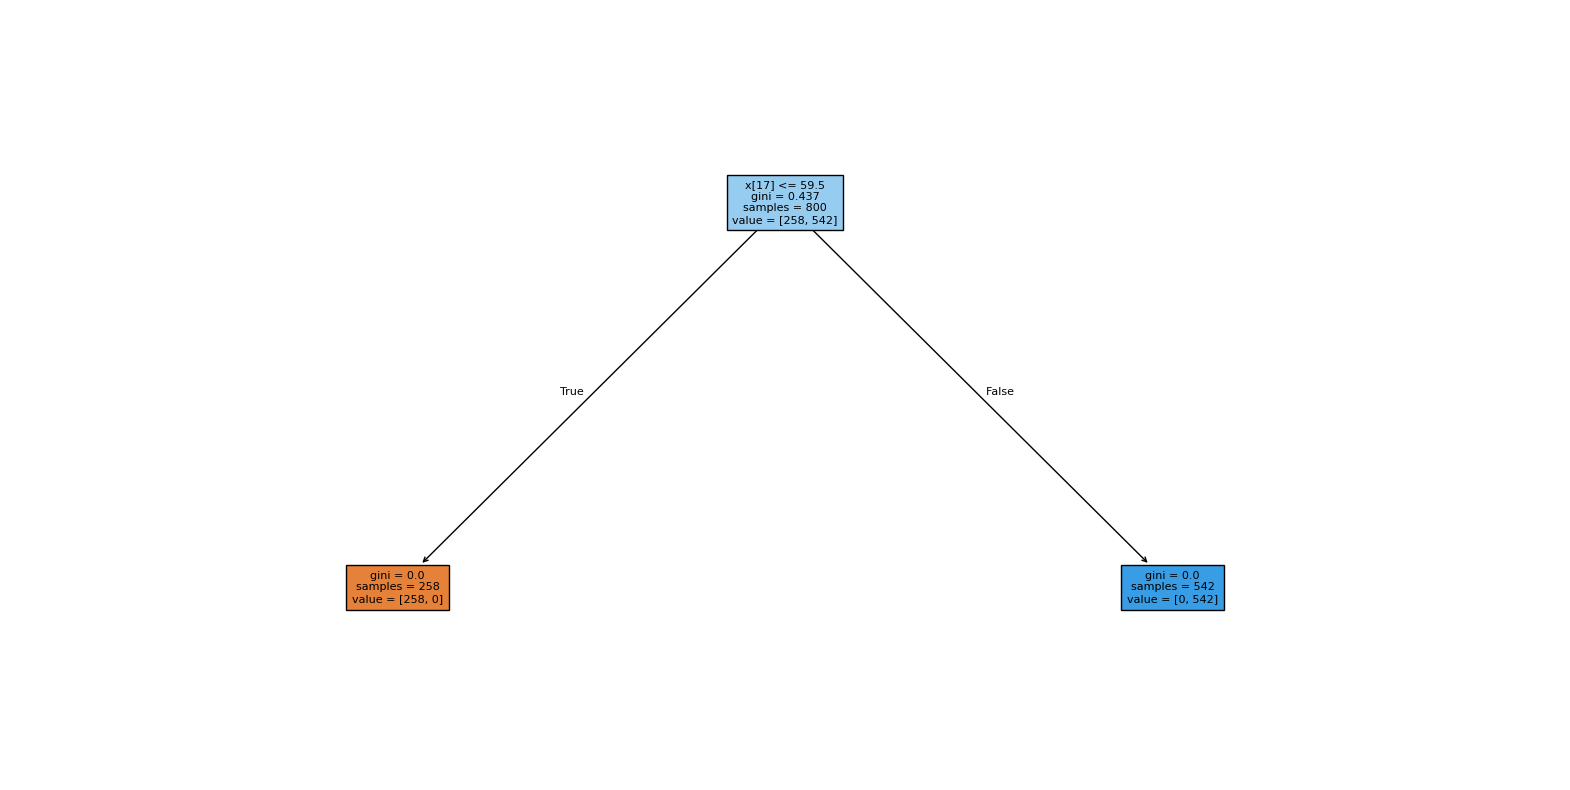

In [38]:
# PLOT DECISION TREE

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, fontsize=8)
plt.show()


In [39]:
# RANDOM FOREST MODEL TRAINING


rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train_p, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

Random Forest Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


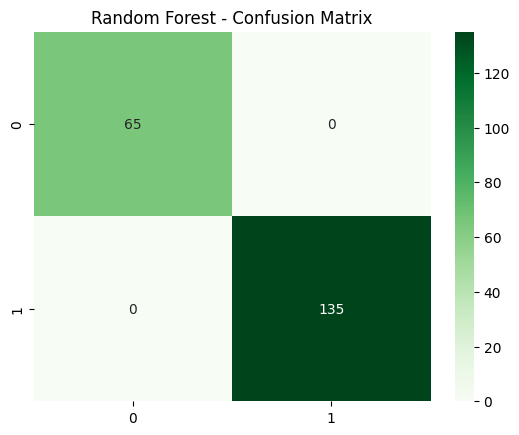

In [40]:
# RANDOM FOREST PERFORMANCE METRICS

rf_preds = rf.predict(X_test_p)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Precision:", precision_score(y_test, rf_preds))
print("Recall:", recall_score(y_test, rf_preds))
print("F1 Score:", f1_score(y_test, rf_preds))

cm_rf = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.show()


In [41]:
# FEATURE IMPORTANCE FROM RANDOM FOREST

importances = rf.feature_importances_
feature_names = preprocessor.get_feature_names_out()

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

importance_df.head(15)


,feature,importance
17,num__math score,0.583554
18,num__reading score,0.163800
19,num__writing score,0.150273
0,cat__gender_female,0.015952
13,cat__lunch_free/reduced,0.015580
14,cat__lunch_standard,0.013694
1,cat__gender_male,0.013107
15,cat__test preparation course_completed,0.004629
16,cat__test preparation course_none,0.004628
2,cat__race/ethnicity_group A,0.004255


In [42]:
# MODEL COMPARISON (DT vs RF)

results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, dt_preds),
        accuracy_score(y_test, rf_preds)
    ],
    "F1 Score": [
        f1_score(y_test, dt_preds),
        f1_score(y_test, rf_preds)
    ]
})

results


,Model,Accuracy,F1 Score
0,Decision Tree,1.0,1.0
1,Random Forest,1.0,1.0
